In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk
from patsy import dmatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 연습문제1

1. 붓꽃 분류 문제에서 클래스가 setosa, versicolor인 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다.
2. 위 결과를 confusion matrix와 classification matrix로 표현한다.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다.

In [2]:
#데이터프레임 정리 : iris불러오기 / sentosa, versicolor만 남기기 / 0과1로 변경

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df1 = df[df['species'].isin(["setosa", "versicolor"])]

In [5]:
df_1 = pd.DataFrame(columns=["sepal_length", "sepal_width", "petal_length","petal_width", "species"])
df_1["sepal_length"] = df1["sepal length (cm)"]
df_1["sepal_width"] = df1["sepal width (cm)"]
df_1["petal_length"] = df1["petal length (cm)"]
df_1["petal_width"] = df1["petal width (cm)"]
df_1["species"] = df1["species"].apply(lambda x : 0 if x == "setosa" else 1)
df_1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


##### 1. 붓꽃 분류 문제에서 클래스가 setosa, versicolor인 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다

In [32]:
#Logit명령 실행
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


model1 = sm.Logit.from_formula("species ~ sepal_length", df_1)
result1 = model1.fit(disp=0)
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.5368
Time:                        16:56:14   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113
================================================================================
"""

##### 2. 위 결과를 confusion matrix와 classification matrix로 표현한다.

In [7]:
#예측결과를 df_1에 반영
df_1["species_pred"] = result1.predict(df_1)
df_1["new_pred"] = df_1["species_pred"].apply(lambda x : 1 if x > 0.5 else 0)
df_1.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,new_pred
95,5.7,3.0,4.2,1.2,1,0.812824,1
96,5.7,2.9,4.2,1.3,1,0.812824,1
97,6.2,2.9,4.3,1.3,1,0.982684,1
98,5.1,2.5,3.0,1.1,1,0.165794,0
99,5.7,2.8,4.1,1.3,1,0.812824,1


In [8]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
species = df_1["species"]
new_pred = df_1["new_pred"]
confusion_matrix(species, new_pred)

array([[45,  5],
       [ 6, 44]])

In [9]:
#classification_matrix
from sklearn.metrics import *
target_names = ['setosa', 'versicolor']
print(classification_report(species, new_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       0.88      0.90      0.89        50
 versicolor       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



##### 3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. (StatsModels 사용)
- SciKit-Learn의 LogisticRegression 써서도 풀어볼 것.

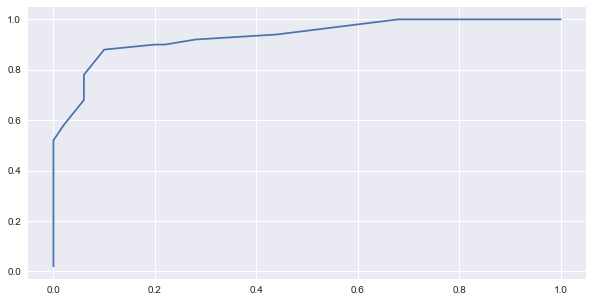

In [16]:
fpr1, tpr1, threshold1 = roc_curve(species, result1.predict(df_1.sepal_length))
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1)

In [17]:
auc(fpr1, tpr1)

0.93259999999999987

### 연습문제2

1. 붓꽃 분류 문제에서 클래스가 versicolor, virginica인 데이터만 사용하고 (versicolor=0, virginica=1) 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다.
2. 위 결과를 confusion matrix와 classification matrix로 표현한다.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다.

In [10]:
#데이터프레임 정리 : versicolor, virginica만 남기기 / 0과1로 변경

In [45]:
df2 = df[df['species'].isin(["versicolor", "virginica"])]

In [47]:
df_2 = pd.DataFrame(columns=["sepal_length", "sepal_width", "petal_length","petal_width", "species"])
df_2["sepal_length"] = df2["sepal length (cm)"]
df_2["sepal_width"] = df2["sepal width (cm)"]
df_2["petal_length"] = df2["petal length (cm)"]
df_2["petal_width"] = df2["petal width (cm)"]
df_2["species"] = df2["species"].apply(lambda x : 0 if x == "versicolor" else 1)
df_2.reset_index(drop=True, inplace=True)
df_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0
5,5.7,2.8,4.5,1.3,0
6,6.3,3.3,4.7,1.6,0
7,4.9,2.4,3.3,1.0,0
8,6.6,2.9,4.6,1.3,0
9,5.2,2.7,3.9,1.4,0


##### 1. 붓꽃 분류 문제에서 클래스가 versicolor, virginica인 데이터만 사용하고 (versicolor=0, virginica=1) 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다.

In [49]:
#Logit명령 실행

model2 = sm.Logit.from_formula("species ~ sepal_length + sepal_width + petal_length + petal_width", df_2)
result2 = model2.fit(disp=0)
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.9142
Time:                        17:09:57   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal_width     -6.6809      4.480     -1.491      0.136     -15.461       2.099
petal_length     9.4294      4.737      1.990      0.047       0.145      18.714
petal_width     18.2861      9.743      1.877      0.061      -0.809      37.381
================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### 2. 위 결과를 confusion matrix와 classification matrix로 표현한다.

In [50]:
#예측결과를 df_2에 반영

X2 = df_2.filter(["sepal_length", "sepal_width", "petal_length","petal_width"])
df_2["species_pred"] = result2.predict(X2)
df_2["new_pred"] = df_2["species_pred"].apply(lambda x : 1 if x > 0.5 else 0)
df_2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,new_pred
95,6.7,3.0,5.2,2.3,1,0.999993,1
96,6.3,2.5,5.0,1.9,1,0.999107,1
97,6.5,3.0,5.2,2.0,1,0.998994,1
98,6.2,3.4,5.4,2.3,1,0.999996,1
99,5.9,3.0,5.1,1.8,1,0.977679,1


In [51]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
species2 = df_2["species"]
new_pred2 = df_2["new_pred"]

In [52]:
confusion_matrix(species2, new_pred2)

array([[49,  1],
       [ 1, 49]])

In [53]:
#classification_matrix
from sklearn.metrics import *
target_names = ['versicolor', 'virginica']
print(classification_report(species2, new_pred2, target_names=target_names))

             precision    recall  f1-score   support

 versicolor       0.98      0.98      0.98        50
  virginica       0.98      0.98      0.98        50

avg / total       0.98      0.98      0.98       100



##### 3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다.

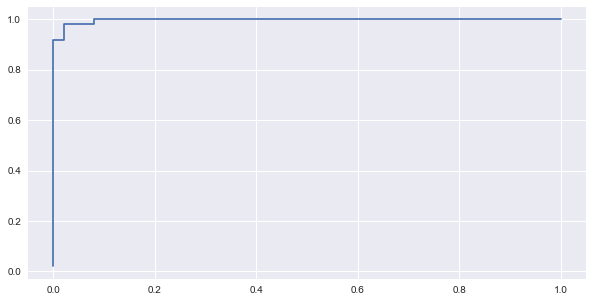

In [54]:
fpr2, tpr2, threshold2 = roc_curve(species2, result2.predict(X2))
plt.figure(figsize=(10,5))
plt.plot(fpr2, tpr2)

In [55]:
auc(fpr2, tpr2)

0.99719999999999998